In [5]:
from pathlib import Path
from lagom.experiment import Configurator

from lagom.utils import pickle_load

from lagom.vis import CurvePlot

In [6]:
def load_results(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    
    list_result = []
    for sub in p.iterdir():
        if sub.is_dir() and (sub/f).exists():
            list_result.append(pickle_load(sub/f))
            
    return list_result


def get_returns(list_result):
    returns = []
    for result in list_result:
        #x_values = [i['evaluation_iteration'][0] for i in result]
        x_values = [i['accumulated_trained_timesteps'][0] for i in result]
        y_values = [i['average_return'][0] for i in result]
        returns.append([x_values, y_values])
        
    return returns


In [11]:
plot = CurvePlot()

In [12]:
list_result = load_results('vpg/logs', 0, 'eval_logs.pkl')
returns = get_returns(list_result)
x_values, y_values = zip(*returns)
plot.add('VPG', y_values, xvalues=x_values)

In [13]:
list_result = load_results('ppo/logs', 0, 'eval_logs.pkl')
returns = get_returns(list_result)
x_values, y_values = zip(*returns)
plot.add('PPO', y_values, xvalues=x_values)

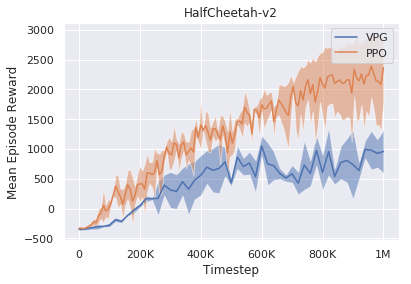

In [14]:
ax = plot(title='HalfCheetah-v2', 
          xlabel='Timestep', 
          ylabel='Mean Episode Reward', 
          num_tick=6, 
          xscale_magnitude=None)